# 1. Importing libraries and data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import datetime
from sklearn import metrics, datasets
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix, accuracy_score,precision_score, recall_score, f1_score,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

In [2]:
# loading the data
data = pd.read_csv('marketing_data.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
data.shape

(2240, 28)

The dataset has 2240 records or rows, and 28 columns 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
# remove whitespace in income column
data.rename({' Income ':'Income'},axis=1,inplace=True)

In [7]:
# descriptions of the columns
col_meaning = {
'ID':"The customer's unique identifier",
'Year_Birth' :"The customer's year of birth",
'Education' :"The customer's level of education level",
'Marital_Status': "The customer's marital status",
'Income': "The annual household income of the customer",
'Kidhome' :"The number of small kids in the customer's househlod",
'Teenhome' : "The number of teenagers in the customer's household",
'Dt_Customer' :"The date when the customer enrolled in the compnay",
'Recency': "number of days since customer's last purchase",
'MntWines' : "The amount the customer spent on wines in last 2 years",
'MntFruits' : "The amount the customer spent on fruits in last 2 years",
'MntMeatProducts': "The amount the customer spent on meat products in last 2 years",
'MntFishProducts':"The amount the customer spent on fish products in last 2 years",
'MntSweetProduct' :"The amount the customer spent on sweet products in last 2 years",
'MntGoldProds': "The amount the customer spent on gold products in last 2 years",
'NumDealsPurchases':"The number of purchases made with discount",
'NumWebPurchases':"The number of purchases made through company's website",
'NumCatalogPurchases' :"The number of purchases made using catalogue",
'NumStorePurchases' :"The number of purchases made directly in stores",
'NumWebVisitsMonth' :"The number of visits to company's website in last month",
'AcceptedCmp1' :"1 if the customer accepted the offer in the 1st campaign, 0 otherwise",
'AcceptedCmp2':"1 if the customer accepted the offer in the 2nd campaign, 0 otherwise",
'AcceptedCmp3': "1 if the customer accepted the offer in the 3rd campaign, 0 otherwise",
'AcceptedCmp4' : "1 if the customer accepted the offer in the 4th campaign, 0 otherwise",
'AcceptedCmp5' : "1 if the customer accepted the offer in the 5th campaign, 0 otherwise",
'Response(target)' :"1 if the customer accepted the offer in the last campaign, 0 otherwise",
'Complain':"1 if the customer complained in the last 2 years",
'Country': "The country where customer is located"}

In [8]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# distribution of object data types
data.describe(include=[object])

,Education,Marital_Status,Income,Dt_Customer,Country
count,2240,2240,2216,2240,2240
unique,5,8,1974,663,8
top,Graduation,Married,"$7,500.00",8/31/12,SP
freq,1127,864,12,12,1095


# 2. Exploratory Data Analysis

## Outline
- Check any null values. Decide on how to handle them
- Check any variables that need transformation
- Check any outliers
- Perform feature engineering
- Check any trends within the data

### 2.1 Data cleaning and Variable Transformation 

In [10]:
# change Income from string to float
data['Income'] = data['Income'].str.replace("[$,]","").astype(float)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [11]:
# change Dt_Customer from string to date
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

The two columns have been transformed successfully

In [13]:
data['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [14]:
# Merge the rows of the Marital_Status column
data['Marital_Status'] = data['Marital_Status'].replace(["Alone","YOLO","Absurd"],"Single")
data['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [15]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [16]:
# Merge the rows of education column
data['Education'] = data['Education'].replace(["2n Cycle","Master"],"Masters")
data['Education'].unique()

array(['Graduation', 'PhD', 'Masters', 'Basic'], dtype=object)

### 2.2 Adding new features

In [17]:
data.filter(regex='Mnt',axis=1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,189,104,379,111,189,218
1,464,5,64,7,0,37
2,134,11,59,15,2,30
3,10,0,1,0,0,0
4,6,16,24,11,0,34
...,...,...,...,...,...,...
2235,372,18,126,47,48,78
2236,5,10,13,3,8,16
2237,185,2,88,15,5,14
2238,267,38,701,149,165,63


In [18]:
# new expenditure column
data['Expenditure'] = data['MntWines'] + data['MntSweetProducts'] + data['MntMeatProducts']+ data['MntGoldProds'] + data['MntFruits'] + data['MntFishProducts']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Expenditure
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,91


<AxesSubplot:xlabel='Expenditure', ylabel='Density'>

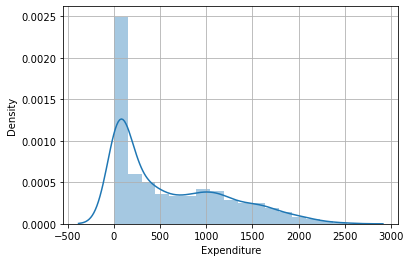

In [19]:
# expenditure distribution
plt.grid()
sns.distplot(data['Expenditure'])

Most expenditure ranges between 0 and $ 2500

In [20]:
# new age column
data['Age'] = datetime.datetime.now().year - data['Year_Birth']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Expenditure,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,1190,52
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,577,61
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,251,64
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,11,55
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,91,33


<AxesSubplot:xlabel='Age', ylabel='Density'>

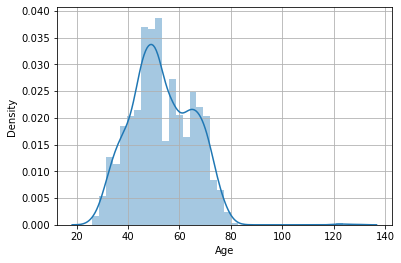

In [21]:
# age distribution
# income distribution
plt.grid()
sns.distplot(data['Age'])

Majority of the customers are aged between 20 and 80 years. 

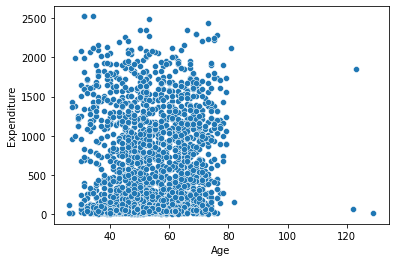

In [22]:
# scatter plot for age and expenditure
sns.scatterplot(x=data['Age'],y=data['Expenditure']);

### 2.3 Check for nulls

In [23]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
Expenditure             0
Age                     0
dtype: int64

Income has 24 missing values

In [24]:
# the percentage of the missing values in income
data['Income'].isnull().sum()/len(data)*100

1.0714285714285714

The percentage of missing values is about 1.07 %

<AxesSubplot:title={'center':'Income'}, xlabel='Income'>

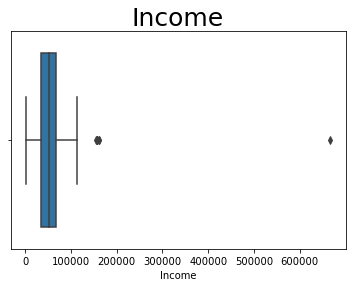

In [25]:
# box plot for income
plt.title('Income',size=25)
sns.boxplot(x='Income',data=data)

<AxesSubplot:xlabel='Income', ylabel='Density'>

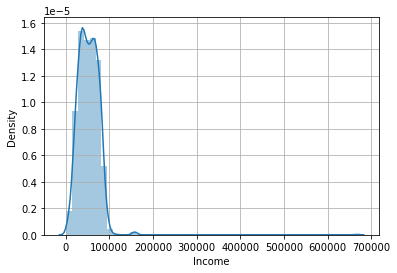

In [26]:
# income distribution
plt.grid()
sns.distplot(data['Income'])

In [27]:
# Two methods can be used. Dropping null values or replacing with median
# since the percentage of missing values is less, missing values can be dropped
data.dropna(inplace=True)
data['Income'].isna().sum()

0

### 2.4 Plotting the Distribution

In [28]:
df_data = data[['Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Age', 'Expenditure']]
df_data.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,Expenditure
0,84835.0,189,104,379,111,189,218,52,1190
1,57091.0,464,5,64,7,0,37,61,577
2,67267.0,134,11,59,15,2,30,64,251
3,32474.0,10,0,1,0,0,0,55,11
4,21474.0,6,16,24,11,0,34,33,91


<Figure size 720x360 with 0 Axes>

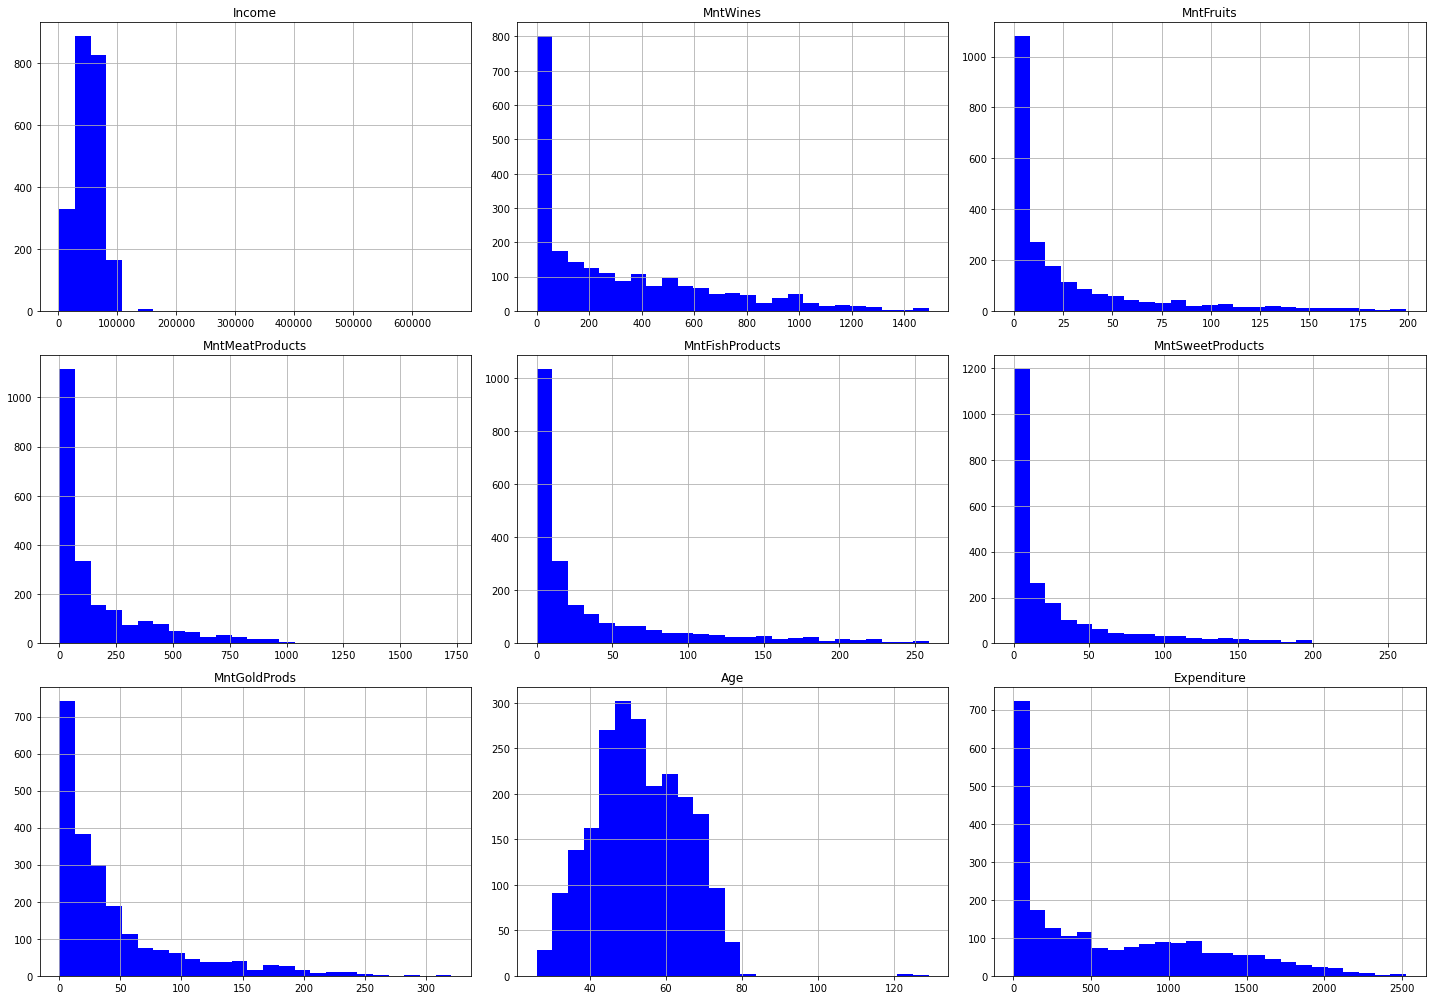

In [29]:
plt.figure(figsize = (10,5))
df_data.hist(figsize = (20,14), color = "blue", bins = 25)
plt.tight_layout()

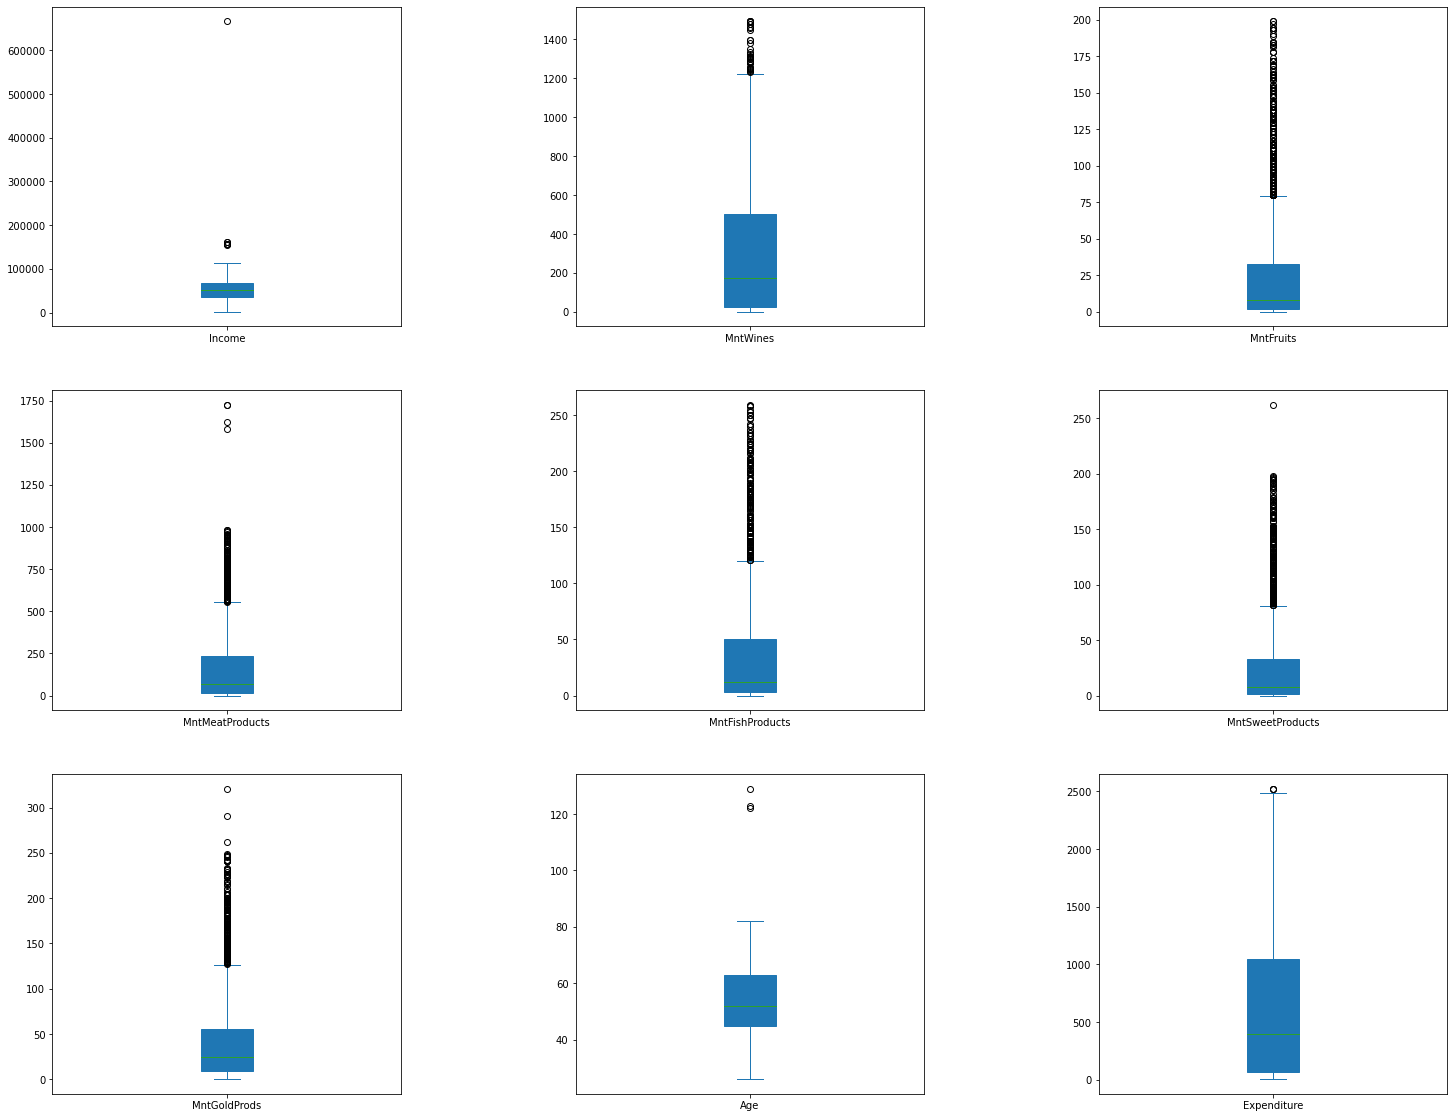

In [30]:
df_data.plot(subplots=True, layout=(3,3), kind='box', figsize=(25,20), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Few outliers in Age and Income

In [31]:
# dealing with the outliers
# drop rows where age is above 120
data = data.drop(data[data['Age'] >= 120].index)
data['Age'].sort_values()

1824    26
562     26
697     27
964     27
1298    27
        ..
1208    79
1202    79
1644    79
1740    81
2171    82
Name: Age, Length: 2213, dtype: int64

In [32]:
# remove entries where income is above 600,000
data = data.drop(data[data['Income'] > 600000].index)
data['Income'].sort_values()

1466      1730.0
961       2447.0
1291      3502.0
663       4023.0
14        4428.0
          ...   
325     157146.0
2204    157243.0
853     157733.0
497     160803.0
731     162397.0
Name: Income, Length: 2212, dtype: float64

In [33]:
# Grouping the data
data_group = data.groupby(['Marital_Status','Education']).aggregate({'Income':'median'})
data_group

Income
Marital_Status Education          
Divorced       Basic        9548.0
               Graduation  55635.0
               Masters     49476.0
               PhD         50613.5
Married        Basic       22352.0
               Graduation  50737.0
               Masters     50017.0
               PhD         57081.5
Single         Basic       16383.0
               Graduation  49973.5
               Masters     49504.0
               PhD         48918.0
Together       Basic       23179.0
               Graduation  53977.0
               Masters     47586.5
               PhD         56575.0
Widow          Basic       22123.0
               Graduation  58275.0
               Masters     51459.5
               PhD         57032.0

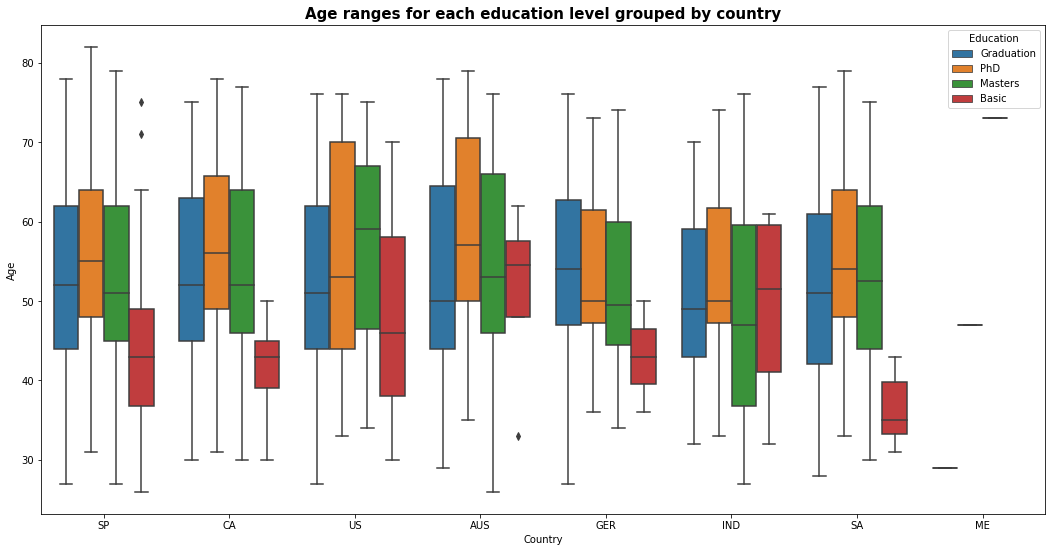

In [34]:
# plotting the Age and Country for the different education levels
plt.figure(figsize=(18,9))
sns.boxplot(x='Country', y='Age', hue='Education',data=data)
plt.title("Age ranges for each education level grouped by country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

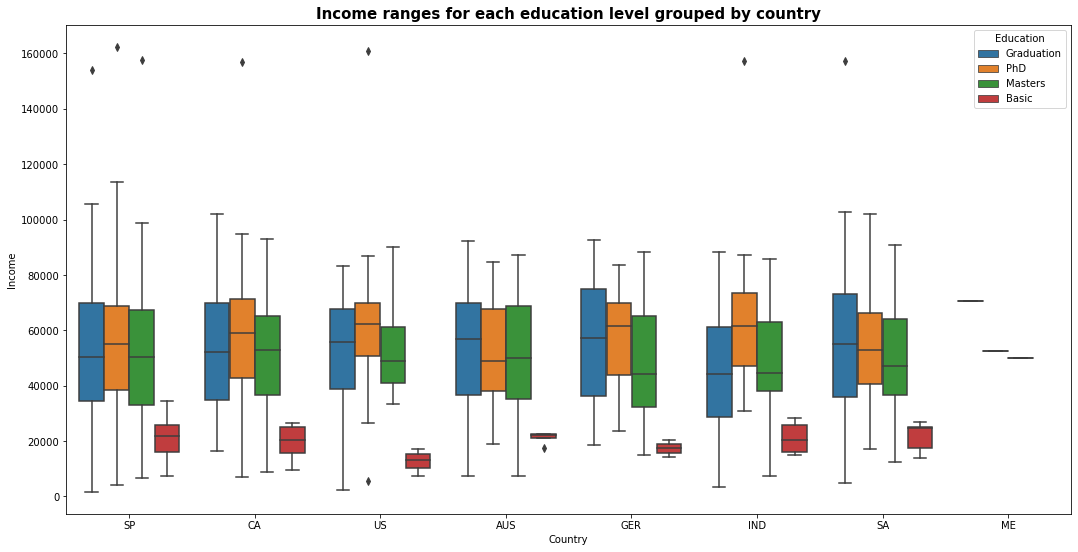

In [35]:
# plotting the Age and Income for the different education levels
plt.figure(figsize=(18,9))
sns.boxplot(x='Country', y='Income', hue='Education',data=data)
plt.title("Income ranges for each education level grouped by country", fontdict={'fontweight':'bold','fontsize':15})
plt.show()

#### Observations
 - Except in Germany, all other countries have many aged people with PHD
 - Except in India and Australia, all countries have low aged customers with basic education level
 - Graduation has a wide income range

### Data correlation: Trends within the data

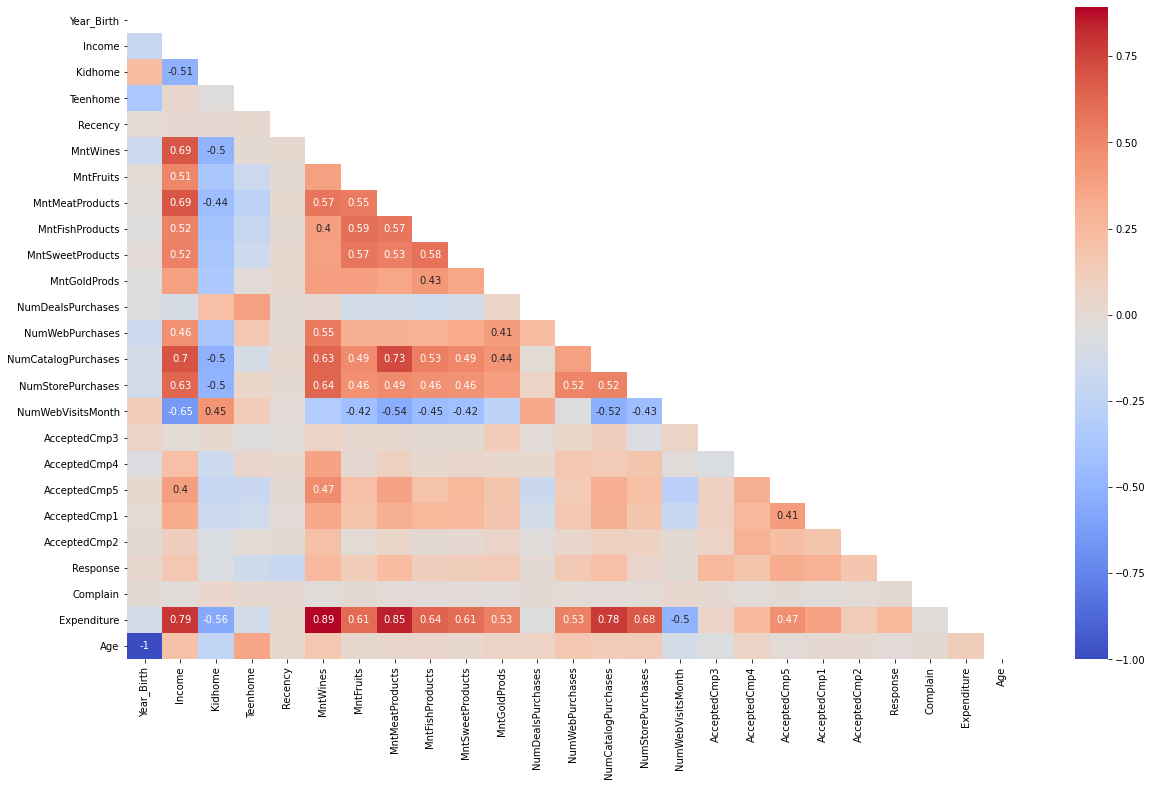

In [36]:
# Drawing a heatmap
fig = plt.figure(figsize=(20,12))
corr = data.drop('ID', axis=1).corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)
for t in ax.texts:
    if abs(float(t.get_text()))>=0.4:
        t.set_text(t.get_text()) #if the value is greater than 0.4 or less than -0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text
plt.show()

### Observations
- All products are positively correlated with income, except for gold products. Wine and meat have the the strongest correlation with income.
- The highest correlation with income is the Catalog purchases (0.7) 
- Number of website visits per month is negatively correlated (-0.65) with income
- Positive correlation for products: 
    - Meat with wine, meat with fruit, 
    - Fish with wine, fish with fruit, fish with meat
    - Sweet with fruit, sweet with meat, sweet with fish
    - Gold with fish
- Campaign 5 has a slight positive correlation with income and wine
- Campaign 1 has a slight positive correlation with campaign 5
- Number of dependents has a negative correlation with all the products, stronger with fruits, meats, and fish.
- total campaigns accepted has a slight positive correlation with wines 0.49

### Where people majorly make purchases from 

In [37]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Expenditure',
       'Age'],
      dtype='object')

In [38]:
purchases = pd.DataFrame(data.iloc[:,16:19].sum(), columns=['amount']).reset_index()
purchases.head()

,index,amount
0,NumWebPurchases,9043
1,NumCatalogPurchases,5911
2,NumStorePurchases,12844


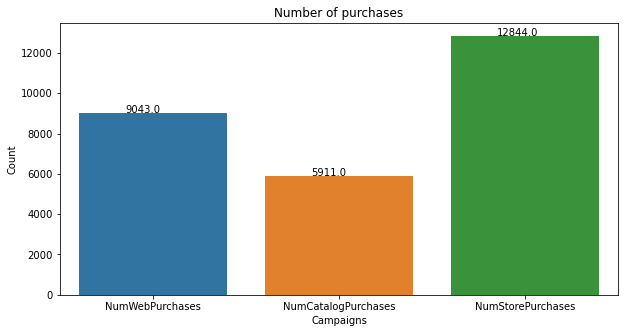

In [39]:
plt.figure(figsize=(10,5))
plt.title('Number of purchases')
yx = sns.barplot(x='index',y='amount',data=purchases);
plt.xlabel('Campaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

The highest purchases where in store,  followed by web, and then the least were from the catalog 

### Performance of the Marketing Campaigns

As a marketing manager, there is the need to understand the performance of the different marketing campaigns. <br> 
Thie entails knowing which of them are successful, and which of them are not <br> 


In [40]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Expenditure',
       'Age'],
      dtype='object')

In [41]:
campaigns = pd.DataFrame(data.iloc[:,20:25].sum(), columns=['amount']).reset_index()
campaigns.head()

,index,amount
0,AcceptedCmp3,163
1,AcceptedCmp4,164
2,AcceptedCmp5,161
3,AcceptedCmp1,142
4,AcceptedCmp2,30


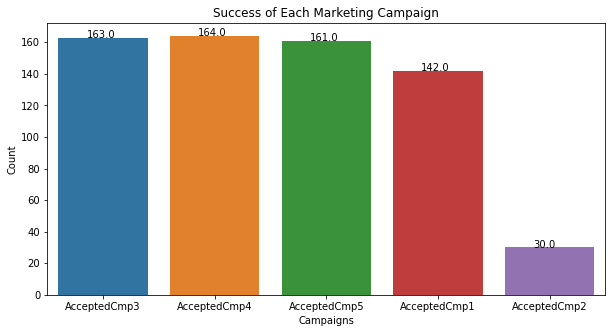

In [42]:
plt.figure(figsize=(10,5))
plt.title('Success of Each Marketing Campaign')
yx = sns.barplot(x='index',y='amount',data=campaigns);
plt.xlabel('Campaigns')
plt.ylabel('Count')
for p in yx.patches: 
    yx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

The results indicate that the campaign 4 was the most successful, followed by 3, 5, 1 and Campaign 2 was the worst performing 

### Revenue generated by different products

As a marketing manager, there is the need to understand the best and worst performing products in terms of the revenue generated. 

In [43]:
revenue = pd.DataFrame(data.iloc[:,9:15].sum(),columns=['revenue_generated']).reset_index()
revenue

,index,revenue_generated
0,MntWines,675296
1,MntFruits,58241
2,MntMeatProducts,369470
3,MntFishProducts,83279
4,MntSweetProducts,59827
5,MntGoldProds,97164


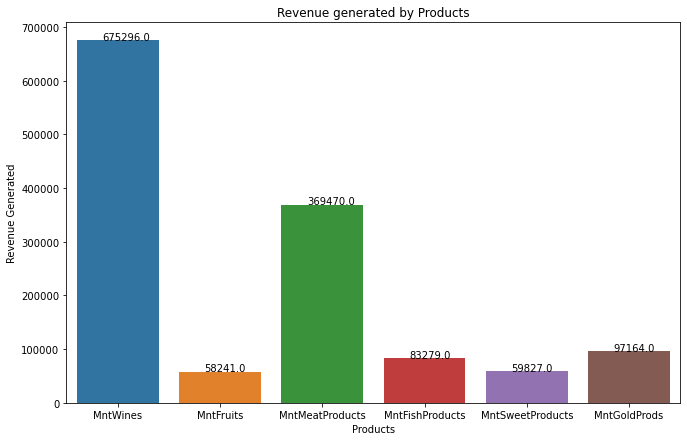

In [44]:
plt.figure(figsize=(11,7))
plt.title("Revenue generated by Products")
yyx= sns.barplot(x='index',y='revenue_generated',data=revenue);
plt.xlabel('Products')
plt.ylabel('Revenue Generated')
for p in yyx.patches: 
    yyx.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()


Wine products produced the highest revenues followed by meat products <br>
Sweet products and fruits produced the lowest revenues


### campaign acceptance

Text(0.5, 1.0, 'Age v/s Income')

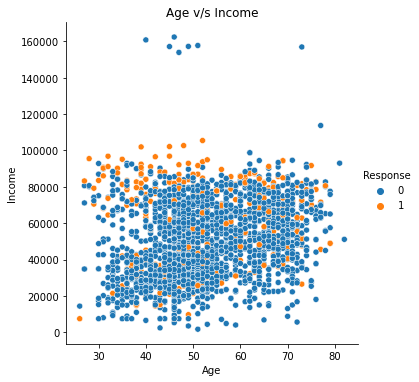

In [45]:
sns.relplot(x='Age',y='Income',hue='Response',data=data)
plt.title('Age v/s Income')

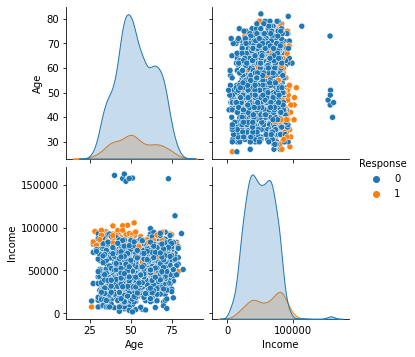

In [46]:
sns.pairplot(vars=['Age','Income'],hue='Response',data=data)

The graph shows that customers between age 25-50, who have income more than 60K$ are the most recent customers

### Last campaign acceptance per country

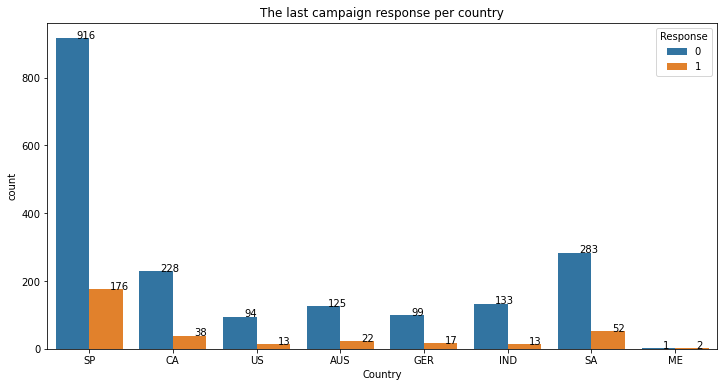

In [47]:
plt.figure(figsize=(12,6))
cs = sns.countplot(x='Country',hue='Response',data=data)
plt.title('The last campaign response per country');
for p in cs.patches: 
    cs.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Most customers who acceppted the campaign where from Spain, followed by South Africa

### Amount spend vs household dependants

In [48]:
data['Dependents']=data['Kidhome']+data['Teenhome']
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Expenditure,Age,Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,1190,52,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,577,61,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,251,64,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,11,55,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,91,33,1


Text(0.5, 1.0, 'Total Expenditure vs dependents')

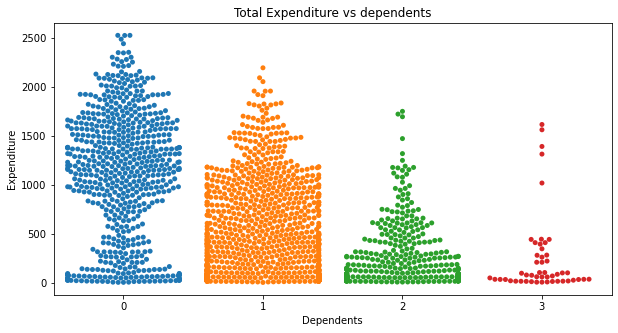

In [49]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Dependents',y='Expenditure',data=data)
plt.title("Total Expenditure vs dependents")

Customers without dependants spend more compared to ones with many dependants

#### Education v/s complaints

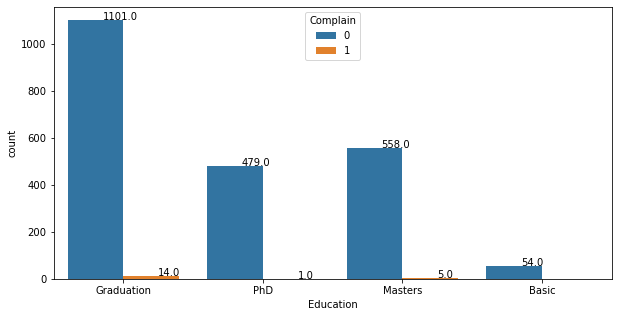

In [50]:
plt.figure(figsize=(10,5))
ec = sns.countplot(x='Education',hue='Complain',data=data)
for p in ec.patches: 
    ec.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 
plt.show()

Many graduates complained in the last 2 years, followed by people with Masters, then customers with PhD. Customers with basic education had less complaints

# Modeling to predict campaign response

In [51]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Expenditure,Age,Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,1190,52,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,577,61,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,251,64,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,11,55,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,91,33,1


In [52]:
#Standardize skewed variables
from sklearn.preprocessing import StandardScaler
columns_scaled = ['Year_Birth', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth',  'Expenditure','Age']

scalar = StandardScaler()
mktdata_scaled = pd.DataFrame(scalar.fit_transform(data[columns_scaled]), columns=columns_scaled, index=data.index)
mktdata_scaled

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Expenditure,Age
0,0.092858,1.527533,-1.694030,-0.344814,1.954708,0.945435,1.339513,3.942228,3.367311,-0.688432,-0.032155,0.453643,0.059532,-1.781997,0.967387,-0.092858
1,-0.676441,0.238458,-1.694030,0.470612,-0.536795,-0.459537,-0.559696,-0.658360,-0.133975,-0.688432,1.062110,0.111982,0.367205,-0.132545,-0.050248,0.676441
2,-0.932874,0.711267,-1.694030,-0.507900,-0.385794,-0.481838,-0.413603,-0.609677,-0.269384,-0.688432,-0.396910,-0.229679,-0.248141,-1.369634,-0.591437,0.932874
3,-0.163575,-0.905327,-1.694030,-0.875583,-0.662628,-0.740531,-0.687527,-0.658360,-0.849707,-0.688432,-1.126420,-0.913000,-1.171160,0.692181,-0.989858,0.163575
4,1.716935,-1.416422,-1.694030,-0.887444,-0.259961,-0.637946,-0.486649,-0.658360,-0.192007,-0.168701,-0.396910,-0.571340,-1.171160,0.692181,-0.857051,-1.716935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.605725,0.674515,1.727245,0.197815,-0.209628,-0.183002,0.170769,0.510043,0.659134,-0.168701,0.332600,-0.229679,1.597897,-0.544908,0.135682,-0.605725
2236,0.691203,-0.971211,1.727245,-0.890409,-0.410961,-0.687008,-0.632742,-0.463626,-0.540201,-0.688432,-1.126420,-0.913000,-0.863487,1.104543,-0.916814,-0.691203
2237,0.605725,-0.262462,1.727245,-0.356675,-0.612295,-0.352491,-0.413603,-0.536652,-0.578889,-0.168701,0.697355,-0.571340,-0.248141,1.104543,-0.495152,-0.605725
2238,0.776680,0.643989,1.727245,-0.113530,0.293706,2.381629,2.033455,3.358026,0.368973,-0.688432,0.332600,0.453643,1.290224,-0.957271,1.287784,-0.776680


In [53]:
#Add the scaled columns back to dataset
mktdata_scaled = pd.concat([mktdata_scaled, data.drop(axis=1, columns=columns_scaled)],axis=1)
mktdata_scaled

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Dependents
0,0.092858,1.527533,-1.694030,-0.344814,1.954708,0.945435,1.339513,3.942228,3.367311,-0.688432,...,2014-06-16,0,0,0,0,0,1,0,SP,0
1,-0.676441,0.238458,-1.694030,0.470612,-0.536795,-0.459537,-0.559696,-0.658360,-0.133975,-0.688432,...,2014-06-15,0,0,0,0,1,1,0,CA,0
2,-0.932874,0.711267,-1.694030,-0.507900,-0.385794,-0.481838,-0.413603,-0.609677,-0.269384,-0.688432,...,2014-05-13,0,0,0,0,0,0,0,US,1
3,-0.163575,-0.905327,-1.694030,-0.875583,-0.662628,-0.740531,-0.687527,-0.658360,-0.849707,-0.688432,...,2014-05-11,0,0,0,0,0,0,0,AUS,2
4,1.716935,-1.416422,-1.694030,-0.887444,-0.259961,-0.637946,-0.486649,-0.658360,-0.192007,-0.168701,...,2014-04-08,1,0,0,0,0,1,0,SP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.605725,0.674515,1.727245,0.197815,-0.209628,-0.183002,0.170769,0.510043,0.659134,-0.168701,...,2013-03-07,0,0,0,0,0,0,0,US,1
2236,0.691203,-0.971211,1.727245,-0.890409,-0.410961,-0.687008,-0.632742,-0.463626,-0.540201,-0.688432,...,2013-01-22,0,0,0,0,0,0,0,SP,1
2237,0.605725,-0.262462,1.727245,-0.356675,-0.612295,-0.352491,-0.413603,-0.536652,-0.578889,-0.168701,...,2012-12-03,0,0,0,0,0,0,0,SP,1
2238,0.776680,0.643989,1.727245,-0.113530,0.293706,2.381629,2.033455,3.358026,0.368973,-0.688432,...,2012-11-29,0,0,0,0,0,0,0,IND,0


### Transform the categorical values

In [54]:
categ_columns = mktdata_scaled.select_dtypes(exclude = np.number)
print("Number of unique values per categorical feature:\n", categ_columns.nunique())
dummies_cat = pd.get_dummies(categ_columns)

Number of unique values per categorical feature:
 Education           4
Marital_Status      5
Dt_Customer       662
Country             8
dtype: int64


In [55]:
# Add to mktdat_scaled Dataframe and change the name as mktdata_trf
mktdata_trf = pd.concat([mktdata_scaled,dummies_cat], axis=1)
mktdata_trf = mktdata_trf.drop(columns=categ_columns.columns)
mktdata_trf = mktdata_trf.drop(['ID'], axis=1)

In [56]:
mktdata_trf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2212 non-null   float64
 1   Income                   2212 non-null   float64
 2   Recency                  2212 non-null   float64
 3   MntWines                 2212 non-null   float64
 4   MntFruits                2212 non-null   float64
 5   MntMeatProducts          2212 non-null   float64
 6   MntFishProducts          2212 non-null   float64
 7   MntSweetProducts         2212 non-null   float64
 8   MntGoldProds             2212 non-null   float64
 9   NumDealsPurchases        2212 non-null   float64
 10  NumWebPurchases          2212 non-null   float64
 11  NumCatalogPurchases      2212 non-null   float64
 12  NumStorePurchases        2212 non-null   float64
 13  NumWebVisitsMonth        2212 non-null   float64
 14  Expenditure             

In [57]:
mktdata_trf.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Marital_Status_Together,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.092858,1.527533,-1.69403,-0.344814,1.954708,0.945435,1.339513,3.942228,3.367311,-0.688432,...,0,0,0,0,0,0,0,0,1,0
1,-0.676441,0.238458,-1.69403,0.470612,-0.536795,-0.459537,-0.559696,-0.658360,-0.133975,-0.688432,...,0,0,0,1,0,0,0,0,0,0
2,-0.932874,0.711267,-1.69403,-0.507900,-0.385794,-0.481838,-0.413603,-0.609677,-0.269384,-0.688432,...,0,0,0,0,0,0,0,0,0,1
3,-0.163575,-0.905327,-1.69403,-0.875583,-0.662628,-0.740531,-0.687527,-0.658360,-0.849707,-0.688432,...,1,0,1,0,0,0,0,0,0,0
4,1.716935,-1.416422,-1.69403,-0.887444,-0.259961,-0.637946,-0.486649,-0.658360,-0.192007,-0.168701,...,0,0,0,0,0,0,0,0,1,0


In [58]:
# Split the data into training and test sets
X = mktdata_trf.drop(['Response'], axis=1)
y = mktdata_trf['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
# utility functions
# printing confusion matrix
def print_cm(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    return cm

In [60]:
# visualizing the confusion matrix
def visualize_cm(cm):
    cls_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    ticks = np.arange(len(cls_names))
    plt.xticks(ticks, cls_names)
    plt.yticks(ticks, cls_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix\n', fontsize = 16)
    plt.ylabel('Actual label',fontsize = 16)
    plt.xlabel('Predicted label',fontsize = 16)

In [61]:
# Printing metrics -> the accuracy, Precision, Recall and F1 Score
def print_metrics(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred, average="binary"))
    print("Recall:",metrics.recall_score(y_test, y_pred, average="binary"))
    print("F1 Score:",metrics.f1_score(y_test, y_pred, average="binary"))

### 1. Logistic Regression

In [62]:
lr = LogisticRegression(C=1e9,solver='liblinear')
lr.fit(X_train, y_train)

# predictions
y_pred_lr = lr.predict(X_test)

# evaluate model using RMSE
print("Logistic regression model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Median value of target variable: ", y.median())

Logistic regression model RMSE:  0.3633279968197552
Median value of target variable:  0.0


In [63]:
# confusion matrix
cm = print_cm(y_test, y_pred_lr)
print(cm)

[[441  23]
 [ 50  39]]


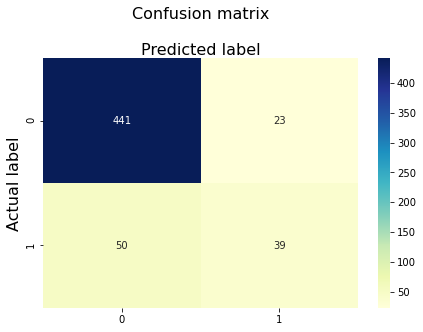

In [64]:
# visualizing the confusion matrix
visualize_cm(cm)

In [65]:
# metrics
print_metrics(y_test, y_pred_lr)

Accuracy: 0.8679927667269439
Precision: 0.6290322580645161
Recall: 0.43820224719101125
F1 Score: 0.5165562913907286


The Logistic Regression Model has an accuracy of <b> 86.8 % </b>

### 2. Decision Tree

In [66]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       min_samples_split=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tr = clf.predict(X_test)

# evaluate model using RMSE
print("Decision Tree model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_tr)))
print("Median value of target variable: ", y.median())


Decision Tree model RMSE:  0.36827146210517725
Median value of target variable:  0.0


In [67]:
# confusion matrix
cm = print_cm(y_test, y_pred_tr)
print(cm)

[[451  13]
 [ 62  27]]


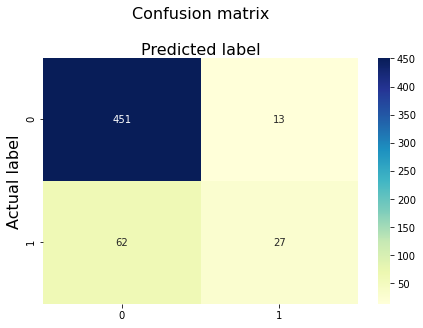

In [68]:
# visualizing the confusion matrix
visualize_cm(cm)

In [69]:
# metrics
print_metrics(y_test, y_pred_tr)

Accuracy: 0.864376130198915
Precision: 0.675
Recall: 0.30337078651685395
F1 Score: 0.41860465116279066


The Decision Tree algorthm has an accuracy of <b>86.44 % </b>

### 3. Gradient Boosting Classifier

In [70]:
gbc = GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=4,
                           min_samples_split=4, n_estimators=300,
                           random_state=3)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# evaluate model using RMSE
print("Gradient Booster Classifier model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_gbc)))
print("Median value of target variable: ", y.median())

Gradient Booster Classifier model RMSE:  0.3428420732070968
Median value of target variable:  0.0


In [71]:
# confusion matrix
cm = print_cm(y_test, y_pred_gbc)
print(cm)

[[443  21]
 [ 44  45]]


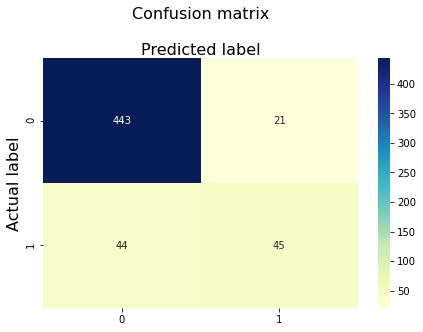

In [72]:
# visualizing the confusion matrix
visualize_cm(cm)

In [73]:
# metrics
print_metrics(y_test, y_pred_gbc)

Accuracy: 0.8824593128390597
Precision: 0.6818181818181818
Recall: 0.5056179775280899
F1 Score: 0.5806451612903225


The Gradient Boosting Classifier has an accuracy of <b>88.25 % </b>

### 4. Neural Network

In [74]:
# set Hyper parameters
learning_rate=0.01
no_epochs=100

In [75]:
# Create the Model
model = Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [76]:
#Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
# Fit model
model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(mktdata_trf),  verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.8373 - accuracy: 0.1832
Epoch 2/100
1/1 - 0s - loss: 0.8244 - accuracy: 0.1947
Epoch 3/100
1/1 - 0s - loss: 0.8119 - accuracy: 0.2031
Epoch 4/100
1/1 - 0s - loss: 0.7999 - accuracy: 0.2110
Epoch 5/100
1/1 - 0s - loss: 0.7882 - accuracy: 0.2266
Epoch 6/100
1/1 - 0s - loss: 0.7769 - accuracy: 0.2471
Epoch 7/100
1/1 - 0s - loss: 0.7660 - accuracy: 0.2694
Epoch 8/100
1/1 - 0s - loss: 0.7554 - accuracy: 0.2984
Epoch 9/100
1/1 - 0s - loss: 0.7451 - accuracy: 0.3189
Epoch 10/100
1/1 - 0s - loss: 0.7352 - accuracy: 0.3478
Epoch 11/100
1/1 - 0s - loss: 0.7256 - accuracy: 0.3755
Epoch 12/100
1/1 - 0s - loss: 0.7162 - accuracy: 0.4141
Epoch 13/100
1/1 - 0s - loss: 0.7073 - accuracy: 0.4461
Epoch 14/100
1/1 - 0s - loss: 0.6987 - accuracy: 0.4780
Epoch 15/100
1/1 - 0s - loss: 0.6903 - accuracy: 0.5166
Epoch 16/100
1/1 - 0s - loss: 0.6823 - accuracy: 0.5491
Epoch 17/100
1/1 - 0s - loss: 0.6745 - accuracy: 0.5865
Epoch 18/100
1/1 - 0s - loss: 0.6670 - accuracy: 0.6251
E

In [78]:
y_pred_NN = model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

18/18 [==============================] - 0s 824us/step - loss: 0.4035 - accuracy: 0.8391
Test accuracy: 0.8390596508979797


The Neural Network has an accuracy of <b> 86.08 % </b>

### 5. XGBoost

In [79]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

xgb_model = xgb.train(param, D_train, steps)
pred_xgb = xgb_model.predict(D_test)
y_pred_xgb = np.asarray([np.argmax(line) for line in pred_xgb])

# evaluate model using RMSE
print("XGBoost model RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("Median value of target variable: ", y.median())

[18:43:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model RMSE:  0.3532335774200949
Median value of target variable:  0.0


In [80]:
# confusion matrix
cm = print_cm(y_test, y_pred_xgb)
print(cm)

[[452  12]
 [ 57  32]]


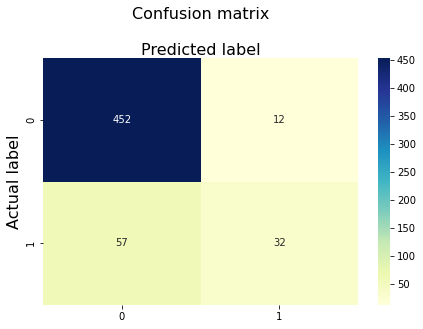

In [81]:
# visualizing the confusion matrix
visualize_cm(cm)

In [82]:
# metrics
print_metrics(y_test, y_pred_xgb)

Accuracy: 0.8752260397830018
Precision: 0.7272727272727273
Recall: 0.3595505617977528
F1 Score: 0.481203007518797


XGBoost algorthm has accuracy of <b> 87.52 % </>

### ROC curves for the models

In [83]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_pred_lr))
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_pred_tr))
print('roc_auc_score for Gradient Boosting Classifer: ', roc_auc_score(y_test, y_pred_gbc))
print('roc_auc_score for Neural Network: ', roc_auc_score(y_test, y_pred_NN))
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_pred_xgb))

roc_auc_score for Logistic Regression:  0.6943166408368849
roc_auc_score for Decision Tree:  0.6376767725687718
roc_auc_score for Gradient Boosting Classifer:  0.7301796784192174
roc_auc_score for Neural Network:  0.7047050561797752
roc_auc_score for XGBoost:  0.6668442464161178


In [84]:
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(y_test, y_pred_lr)
false_positive_rate_tr, true_positive_rate_tr, threshold_tr = roc_curve(y_test, y_pred_tr)
false_positive_rate_gbc, true_positive_rate_gbc, threshold_gbc = roc_curve(y_test, y_pred_gbc)
false_positive_rate_NN, true_positive_rate_NN, threshold_NN = roc_curve(y_test, y_pred_NN)
false_positive_rate_xgb, true_positive_rate_xgb, threshold_xgb = roc_curve(y_test, y_pred_xgb)

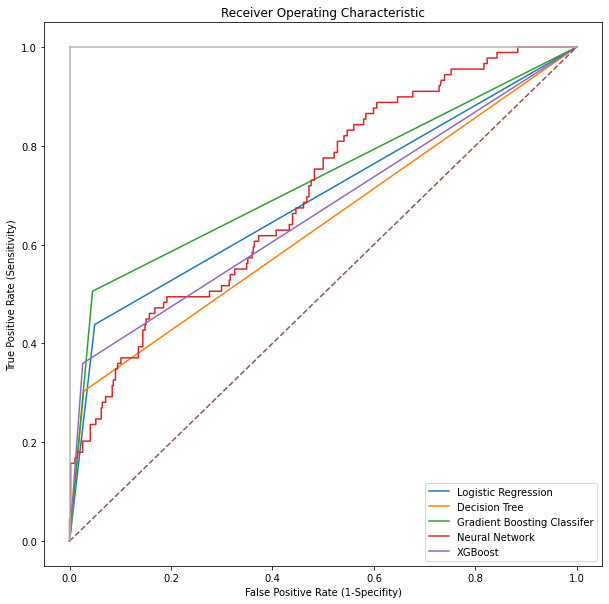

In [86]:
# Plotting the curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lr, true_positive_rate_lr)
plt.plot(false_positive_rate_tr, true_positive_rate_tr)
plt.plot(false_positive_rate_gbc, true_positive_rate_gbc)
plt.plot(false_positive_rate_NN, true_positive_rate_NN)
plt.plot(false_positive_rate_xgb, true_positive_rate_xgb)

plt.legend(['Logistic Regression', 'Decision Tree','Gradient Boosting Classifer', 'Neural Network', 'XGBoost' ])

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlabel("False Positive Rate (1-Specifity)")
plt.show()

# Conclusion

The purpose of this analysis was to study the effectiveness of previous marketing campaigns and propose better data-driven marketing solutions that will increase the response rates. 
- The exploratory analysis has shown the age group that the company serves, their income ranges, and the amounnt that the customers have spent in purchases.
- The analysis has shown that all products are positively correlated with income, except for gold products. Wine and meat have the the strongest correlation with income.People with high income buy wine and meat products. 
- The highest correlation with income is the Catalog purchases (0.7). This implies people with high income shop via the company's catalogue. 
- Wine products produced the highest revenues followed by meat products.
- Sweet products and fruits produced the lowest revenues.
- Number of website visits per month is negatively correlated (-0.65) with income. This implies people with high income dont shop via the website.
- The results indicate that the campaign 4 was the most successful, followed by 3, 5, 1 and Campaign 2 was the worst performing. The company can further investigate what attributes of this campaign made it successful, understand where and why people are accepting it, etc, and apply it to future campaigns.
- The analysis shows that customers between age 25-50, who have income more than 60K dollars are the most recent customers
- Most customers who acceppted the campaign where from Spain, followed by South Africa.
- The households without dependants spend more than the ones with one or more dependents.  
- To increase the number of in store purchases, the company should come up with ways of attracting more people to the website. For instance, through better UI/UX and/or more outreach online. 
- Also, since income was one of the significant features, the company can further analyze what products each income class bought and improve their strategy on selling those specific products to that target demographic.
- In store purchases were the top performing channel, so the company can find other ways to improve the 2 others (website purchases and catalog purchases)

Modelling has been performed to show how the company can use same data to predict campaign response (whether people will accept campaign offer or not. Different classification algorthms have been compared and the Gradient Boost classifier was the best performing model. The model can be used to predict whether people will accept marketing campaign offers or not. 